# Group 16: SIT307 Data Mining Group Project

Dataset Selected/used: <b>COVID-19 World Vaccination Progress</b>

Found at: https://www.kaggle.com/gpreda/covid-world-vaccination-progress

Collected by: <b>Gabriel Preda</b>

Updated: <b>Daily</b>

Date of download: <b>xx April 2021</b>

Cleaning and organizing data

1. find dataset info include # of columns, name of columns, no-null values and datatypes  
2. See head and tail of dataset
3. find data entry error e.g. category, duplicated or similar value to merge, unique values
4. find missing values and identify if it is replaceableble 
5. find outliers 

In [99]:
# import libraries used
import numpy as np
import pandas as pd
pd.set_option('precision', 2)
from pandas_profiling import ProfileReport
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

## Data Cleansing

In [100]:
# read in CSV file to vaccination and preview head
vaccination = pd.read_csv('data/country_vaccinations.csv')
vaccination.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,22/02/2021,0.000000,0.000000,nan,nan,nan,0.000000,0.000000,nan,nan,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,23/02/2021,nan,nan,nan,nan,1367.000000,nan,nan,nan,35.000000,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,24/02/2021,nan,nan,nan,nan,1367.000000,nan,nan,nan,35.000000,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,25/02/2021,nan,nan,nan,nan,1367.000000,nan,nan,nan,35.000000,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,26/02/2021,nan,nan,nan,nan,1367.000000,nan,nan,nan,35.000000,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [101]:
# See what the column headings are
vaccination.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [102]:
# and the data type stored in those columns
vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              8451 non-null   object 
 1   iso_code                             8451 non-null   object 
 2   date                                 8451 non-null   object 
 3   total_vaccinations                   5231 non-null   float64
 4   people_vaccinated                    4688 non-null   float64
 5   people_fully_vaccinated              3186 non-null   float64
 6   daily_vaccinations_raw               4415 non-null   float64
 7   daily_vaccinations                   8260 non-null   float64
 8   total_vaccinations_per_hundred       5231 non-null   float64
 9   people_vaccinated_per_hundred        4688 non-null   float64
 10  people_fully_vaccinated_per_hundred  3186 non-null   float64
 11  daily_vaccinations_per_million

In [103]:
# and the shape of the data set
vaccination.shape

(8451, 15)

Check categorical columns for spelling errors and misprints/typos:

In [104]:
# check the unique values of country
vaccination.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands',
       'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Faeroe Islands',
       'Falkland Islands', 'Finland', 'France', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guatemala',
       'Guernsey', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Laos

In [105]:
# check the unique values of ISO code
vaccination.iso_code.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BMU', 'BOL', 'BRA', 'BGR', 'KHM', 'CAN', 'CYM', 'CHL', 'CHN',
       'COL', 'CRI', 'CIV', 'HRV', 'CYP', 'CZE', 'DNK', 'DMA', 'DOM',
       'ECU', 'EGY', 'SLV', 'OWID_ENG', 'GNQ', 'EST', 'FRO', 'FLK', 'FIN',
       'FRA', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY',
       'GIN', 'GUY', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN',
       'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ',
       'KEN', 'KWT', 'LAO', 'LVA', 'LBN', 'LIE', 'LTU', 'LUX', 'MAC',
       'MWI', 'MYS', 'MDV', 'MLT', 'MUS', 'MEX', 'MDA', 'MCO', 'MNG',
       'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NZL',
       'NGA', 'MKD', 'OWID_CYN', 'OWID_NIR', 'NOR', 'OMN', 'PAK', 'PAN',
       'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'RWA',
       'SHN', 'KNA', 'LCA', 'VCT', 'SMR', 'SAU', 'OWID_SCT', 'SEN', 'SRB',
       

In [106]:
# check the unique values of vaccine used in the country
vaccination.vaccines.unique()

array(['Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech', 'Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac', 'Sinopharm/Beijing',
       'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Moderna, Pfizer/BioNTech', 'Moderna',
       'Moderna, Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'EpiVacCorona, Sputnik V', 'Johnson&Johnson',
       'Pfizer/BioNTech, Sputnik V',
   

In [107]:
# check the unique values of source name
vaccination.source_name.unique()

array(['Government of Afghanistan', 'Ministry of Health',
       'Government of Andorra',
       'Government of Australia via covidlive.com.au',
       'Government of Azerbaijan', 'Government of the Bahamas',
       'Directorate General of Health Services', 'Sciensano',
       'Government of Bermuda',
       'Official data from provinces via covid19tracker.ca',
       'Cayman Islands Government',
       'Department of Statistics and Health Information',
       'National Health Commission',
       'Ministry of Health via Universidad de La Sabana',
       'Costa Rican Social Security Fund',
       'Ministry of Health and Public Hygiene', 'Government of Cyprus',
       'Statens Serum Institut', 'Government of Dominica',
       'Ministry of Public Health', 'Government of Ecuador via Ecuacovid',
       'Government of the United Kingdom', 'National Health Board',
       'Government of the Faeroe Islands',
       'Government of the Falkland Islands',
       'Finnish Institute for Health and W

In [108]:
# check the unique values of source website
vaccination.source_website.unique()

array(['http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm',
       'https://coronavirus.al/lajme/covid19-ministria-e-shendetesise-1827-te-vaksinuar-3070-testime-550-te-sheruar-425-raste-te-reja-dhe-12-humbje-jete-ne-24-oret-e-fundit/',
       'https://www.echoroukonline.com/%d9%84%d9%82%d8%a7%d8%ad-%d9%83%d9%88%d8%b1%d9%88%d9%86%d8%a7-%d8%b9%d8%b6%d9%88-%d8%a8%d8%a7%d9%84%d9%84%d8%ac%d9%86%d8%a9-%d8%a7%d9%84%d8%b9%d9%84%d9%85%d9%8a%d8%a9-%d9%8a%d9%83%d8%b4%d9%81-%d8%b9/',
       'https://www.govern.ad/comunicats/item/12558-el-govern-repren-l-administracio-del-vacci-d-oxford-astrazeneca-a-partir-de-dilluns',
       'https://www.angop.ao/en/noticias/saude/covid-19-angola-vacina-mais-de-80-mil-cidadaos/',
       'https://www.facebook.com/MinistryofHealthAnguilla/posts/1416076468746925?__cft__[0]=AZUg69IJENUHboczW8qOAnM__Hiwo_LW-XjrnGc-LFhs9cKDdCt68zfDDaLBDKbZ8oy_EmlCWrdoZ_JHIhLgcjYC245vzoi4Xr2nLO2lPczTYfS9KmygmqYNXYxAHMs6MstvEvuflHR3FuntLl_03dNV&__tn__=%2CO%2CP-R',
 

No errors or misprints/typos found therefore no cleaning is required here.

Check numerical columns for unreasonable minimum values:

In [109]:
# set pandas to float format to show full numbers
pd.set_option('float_format', '{:f}'.format)

# descriptive statistical values showing mean and five number summary
vaccination.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,5231.000000,4688.000000,3186.000000,4415.000000,8260.000000,5231.000000,4688.000000,3186.000000,8260.000000
mean,2792692.129421,2156748.130546,950346.089768,99310.352208,63461.179540,10.456412,7.859851,3.829357,2722.191889
std,10191138.729438,7169883.975902,3817420.599500,335984.658804,230293.608592,18.453447,12.320235,8.163778,4129.512041
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,42388.500000,39101.500000,20137.000000,2825.500000,1073.000000,0.820000,0.830000,0.440000,368.750000
50%,289210.000000,258811.000000,121351.500000,14152.000000,6158.500000,3.950000,3.295000,1.550000,1356.000000
75%,1367629.000000,1034796.000000,503932.750000,57538.500000,27990.000000,11.710000,8.920000,3.430000,3347.750000
max,140180735.000000,91707729.000000,50141769.000000,6124000.000000,3923000.000000,171.100000,91.850000,79.260000,54264.000000


No negative values found and no unreasonable values such as over 100 people per 100 people fully vaccinated.

Test the number of null values per column to see which ones have high missing value ratios. However, don't remove the row as the row could contain valuable information to a different column. Missing value removal will be done when the column wants to be used.

In [110]:
# get the count of null values in each column
vaccination.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     3220
people_vaccinated                      3763
people_fully_vaccinated                5265
daily_vaccinations_raw                 4036
daily_vaccinations                      191
total_vaccinations_per_hundred         3220
people_vaccinated_per_hundred          3763
people_fully_vaccinated_per_hundred    5265
daily_vaccinations_per_million          191
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Transform date data type to date time instead of object. 

In [111]:
# convert data format to day, month, year
vaccination['date'] = pd.to_datetime(vaccination['date'], format="%d/%m/%Y", errors='raise')

# check data type of date is now date time
vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              8451 non-null   object        
 1   iso_code                             8451 non-null   object        
 2   date                                 8451 non-null   datetime64[ns]
 3   total_vaccinations                   5231 non-null   float64       
 4   people_vaccinated                    4688 non-null   float64       
 5   people_fully_vaccinated              3186 non-null   float64       
 6   daily_vaccinations_raw               4415 non-null   float64       
 7   daily_vaccinations                   8260 non-null   float64       
 8   total_vaccinations_per_hundred       5231 non-null   float64       
 9   people_vaccinated_per_hundred        4688 non-null   float64       
 10  people_fully

#### Z-Scores
Check the numerical column Z-scores to determine outliers

In [112]:
# take just numerical columns and determine Z-score in new data frame called z-scores
z_score_cols = vaccination[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw',
                          'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                          'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']].copy()

z_scores = pd.DataFrame(stats.zscore(z_score_cols, nan_policy='omit'))

In [113]:
# display Z-Score descriptive statistics to determine average, max, min, lower and upper quartile of Z-scores
z_scores.describe()

,0,1,2,3,4,5,6,7,8
count,5231.000000,4688.000000,3186.000000,4415.000000,8260.000000,5231.000000,4688.000000,3186.000000,8260.000000
mean,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000
std,1.000096,1.000107,1.000157,1.000113,1.000061,1.000096,1.000107,1.000157,1.000061
min,-0.274058,-0.300839,-0.248989,-0.295614,-0.275579,-0.566691,-0.638031,-0.469140,-0.659244
25%,-0.269898,-0.295384,-0.243713,-0.287203,-0.270924,-0.522251,-0.570655,-0.415235,-0.569942
50%,-0.245676,-0.264738,-0.217195,-0.253488,-0.248840,-0.352619,-0.370556,-0.279247,-0.330856
75%,-0.139847,-0.156498,-0.116959,-0.124341,-0.154035,0.067939,0.086059,-0.048926,0.151494
max,13.482416,12.491211,12.888060,17.933474,16.760224,8.706175,6.817979,9.241124,12.482087


In [136]:
z_scores[z_scores > np.abs(5.0)].count()

0    51
1    47
2    32
3    51
4    96
5    48
6    28
7    43
8    54
dtype: int64

As there are a large number of high z scores (greater than 5) due to different countries vaccination capabilities at different stages of their role outs, no outliers will be removed as this is valuable data and would lose a large number of data records.

#### Duplicate Rows
Duplicate rows were determined in order to remove these so as not to provide misleading analysis

In [114]:
# test for duplicate rows
vaccination.duplicated().sum()

0

No duplicate rows found

#### Feature Selection
Filter stratergy was used to remove columns with low information gain and duplication that would not be neccisary for any of our analysis

In [115]:
# drop source name, source website, raw daily vaccinations and ISO codes from dataframe to leave a clean and smaller dataset
vaccination.drop(columns=['source_name', 'source_website', 'iso_code', 'daily_vaccinations_raw'])

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.000000,0.000000,nan,nan,0.000000,0.000000,nan,nan,Oxford/AstraZeneca
1,Afghanistan,2021-02-23,nan,nan,nan,1367.000000,nan,nan,nan,35.000000,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,nan,nan,nan,1367.000000,nan,nan,nan,35.000000,Oxford/AstraZeneca
3,Afghanistan,2021-02-25,nan,nan,nan,1367.000000,nan,nan,nan,35.000000,Oxford/AstraZeneca
4,Afghanistan,2021-02-26,nan,nan,nan,1367.000000,nan,nan,nan,35.000000,Oxford/AstraZeneca
...,...,...,...,...,...,...,...,...,...,...,...
8446,Zimbabwe,2021-03-23,44135.000000,44135.000000,nan,655.000000,0.300000,0.300000,nan,44.000000,Sinopharm/Beijing
8447,Zimbabwe,2021-03-24,49404.000000,49404.000000,nan,1400.000000,0.330000,0.330000,nan,94.000000,Sinopharm/Beijing
8448,Zimbabwe,2021-03-25,54892.000000,54892.000000,nan,2127.000000,0.370000,0.370000,nan,143.000000,Sinopharm/Beijing
8449,Zimbabwe,2021-03-26,61093.000000,61093.000000,nan,2772.000000,0.410000,0.410000,nan,187.000000,Sinopharm/Beijing


## Exploratory Data Analysis
1. What vaccines are used in which countries?
2. Which countries are the most vaccinated? 
3. Most vaccinated countries per percentgage of the population?
4. Which vaccines is the most used around the globe?

Pearson Correlation was used to determine correlation between different columns

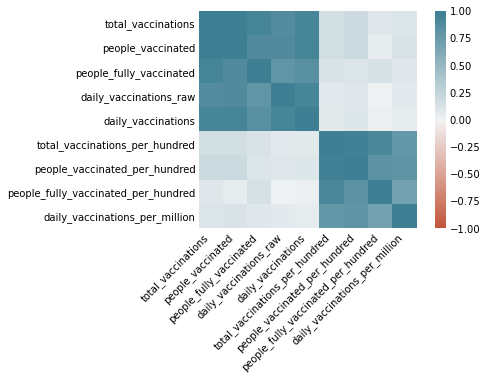

In [116]:
# determine pearson correlation and display as heat map
corr = vaccination.corr(method='pearson')

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# source from https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

Descriptive statistics were able to be used to determine some interesting information such as country who has administered the most vaccines, the highest number of fully vaccinated people, the most vaccines administered on a single day, the country that has administered at least one dose to the largest percentage of their population and the most used vaccine around the world.

#### Most used vaccine

In [117]:
# Most used vaccine
most_vac = vaccination[['country','vaccines']]
most_vac.columns

Index(['country', 'vaccines'], dtype='object')

In [118]:
most_vac = pd.concat([most_vac['country'], most_vac['vaccines'].str.split(', ', expand=True)], axis=1)
most_vac

,country,0,1,2,3,4
0,Afghanistan,Oxford/AstraZeneca,None,None,None,None
1,Afghanistan,Oxford/AstraZeneca,None,None,None,None
2,Afghanistan,Oxford/AstraZeneca,None,None,None,None
3,Afghanistan,Oxford/AstraZeneca,None,None,None,None
4,Afghanistan,Oxford/AstraZeneca,None,None,None,None
...,...,...,...,...,...,...
8446,Zimbabwe,Sinopharm/Beijing,None,None,None,None
8447,Zimbabwe,Sinopharm/Beijing,None,None,None,None
8448,Zimbabwe,Sinopharm/Beijing,None,None,None,None
8449,Zimbabwe,Sinopharm/Beijing,None,None,None,None


In [119]:
most_vac = most_vac.melt(id_vars=['country'])
most_vac

,country,variable,value
0,Afghanistan,0,Oxford/AstraZeneca
1,Afghanistan,0,Oxford/AstraZeneca
2,Afghanistan,0,Oxford/AstraZeneca
3,Afghanistan,0,Oxford/AstraZeneca
4,Afghanistan,0,Oxford/AstraZeneca
...,...,...,...
42250,Zimbabwe,4,None
42251,Zimbabwe,4,None
42252,Zimbabwe,4,None
42253,Zimbabwe,4,None


In [120]:
most_vac.drop('variable', axis=1, inplace=True)
most_vac.isnull().sum()

country        0
value      25072
dtype: int64

In [121]:
most_vac.columns = ['country','vaccines']
most_vac.head()

,country,vaccines
0,Afghanistan,Oxford/AstraZeneca
1,Afghanistan,Oxford/AstraZeneca
2,Afghanistan,Oxford/AstraZeneca
3,Afghanistan,Oxford/AstraZeneca
4,Afghanistan,Oxford/AstraZeneca


In [122]:
print(len(most_vac.vaccines.unique()))
most_vac.vaccines.unique()

11


array(['Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sputnik V', 'Moderna',
       'Sinovac', 'Sinopharm/Beijing', 'Covaxin', 'EpiVacCorona',
       'Johnson&Johnson', None, 'Sinopharm/Wuhan'], dtype=object)

In [123]:
most_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42255 entries, 0 to 42254
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   42255 non-null  object
 1   vaccines  17183 non-null  object
dtypes: object(2)
memory usage: 660.4+ KB


In [124]:
most_vac = most_vac.dropna(axis=0)
most_vac.isnull().sum()

country     0
vaccines    0
dtype: int64

In [125]:
print(len(most_vac.vaccines.unique()))

10


In [126]:
summary = most_vac.groupby('vaccines')['country'].agg(['unique'])
summary

,unique
vaccines,
Covaxin,[India]
EpiVacCorona,[Russia]
Johnson&Johnson,"[South Africa, United States]"
Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ..."
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba..."
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch..."
Sinopharm/Beijing,"[Cambodia, China, Egypt, Equatorial Guinea, La..."
Sinopharm/Wuhan,"[China, United Arab Emirates]"
Sinovac,"[Azerbaijan, Indonesia, Brazil, Chile, Colombi..."


In [127]:
summary['nCountry'] = summary.unique.str.len()
summary

,unique,nCountry
vaccines,,
Covaxin,[India],1
EpiVacCorona,[Russia],1
Johnson&Johnson,"[South Africa, United States]",2
Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ...",34
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba...",92
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch...",80
Sinopharm/Beijing,"[Cambodia, China, Egypt, Equatorial Guinea, La...",21
Sinopharm/Wuhan,"[China, United Arab Emirates]",2
Sinovac,"[Azerbaijan, Indonesia, Brazil, Chile, Colombi...",14


In [128]:
summary.nCountry.sum()

267

In [129]:
summary = summary.assign(pCountry = lambda x: ((x['nCountry'])/summary.nCountry.sum()) * 100)
summary

,unique,nCountry,pCountry
vaccines,,,
Covaxin,[India],1,0.374532
EpiVacCorona,[Russia],1,0.374532
Johnson&Johnson,"[South Africa, United States]",2,0.749064
Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ...",34,12.734082
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba...",92,34.456929
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch...",80,29.962547
Sinopharm/Beijing,"[Cambodia, China, Egypt, Equatorial Guinea, La...",21,7.865169
Sinopharm/Wuhan,"[China, United Arab Emirates]",2,0.749064
Sinovac,"[Azerbaijan, Indonesia, Brazil, Chile, Colombi...",14,5.243446


In [130]:
summary.sort_values('nCountry', ascending=False)

,unique,nCountry,pCountry
vaccines,,,
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba...",92,34.456929
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch...",80,29.962547
Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ...",34,12.734082
Sinopharm/Beijing,"[Cambodia, China, Egypt, Equatorial Guinea, La...",21,7.865169
Sputnik V,"[Algeria, Belarus, Bolivia, Guinea, Iran, Kaza...",20,7.490637
Sinovac,"[Azerbaijan, Indonesia, Brazil, Chile, Colombi...",14,5.243446
Johnson&Johnson,"[South Africa, United States]",2,0.749064
Sinopharm/Wuhan,"[China, United Arab Emirates]",2,0.749064
Covaxin,[India],1,0.374532


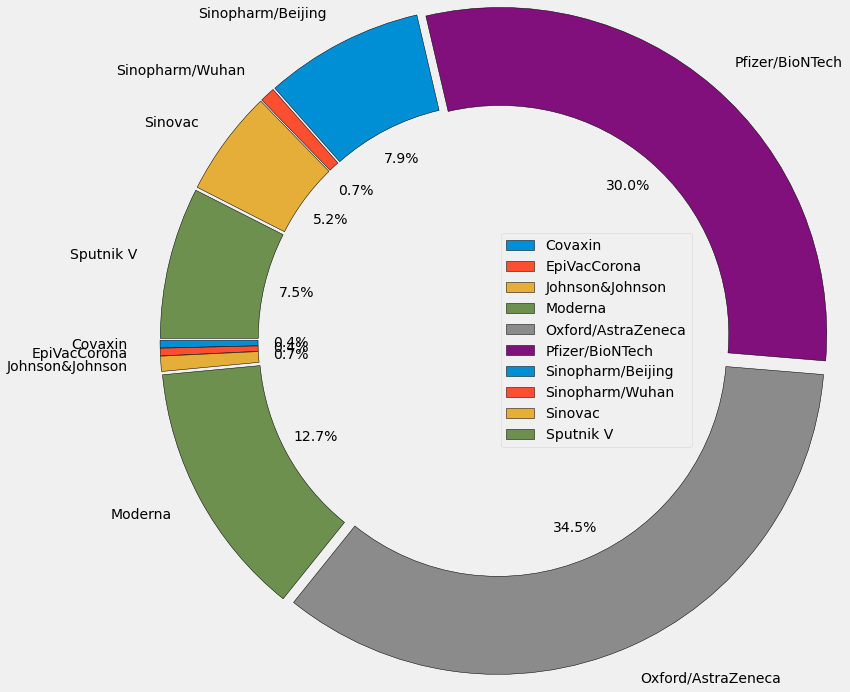

In [131]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
labels = summary.index

plt.pie(summary.pCountry, labels=labels, explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], 
        wedgeprops={'edgecolor':'black', 'width':0.6}, startangle=180, autopct='%1.1F%%', radius=2)

plt.legend(loc='right')
plt.show()

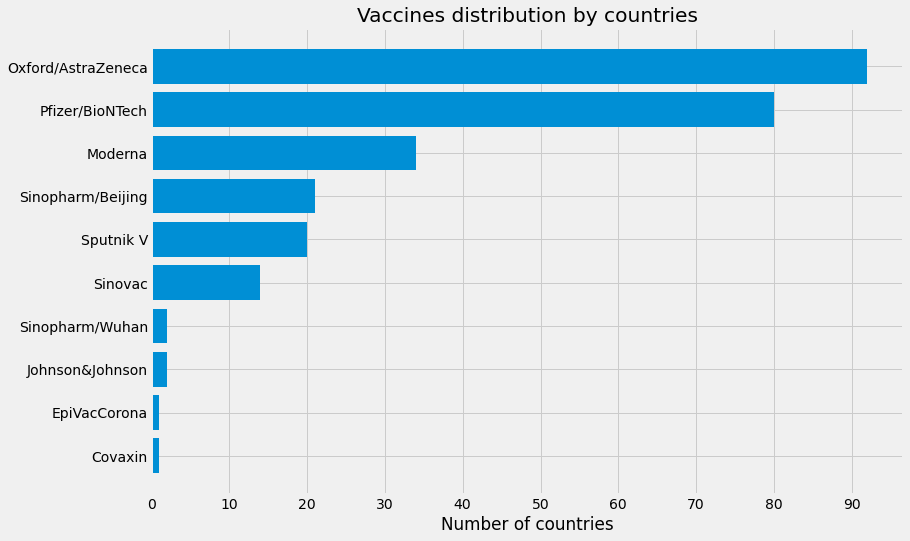

In [132]:
summary = summary.sort_values('nCountry')

plt.figure(figsize=(12,8))
plt.title("Vaccines distribution by countries")
plt.style.use('fivethirtyeight')
plt.xlabel('Number of countries')
plt.xticks(np.arange(0,110,10))

plt.barh(summary.index, summary.nCountry)
plt.show()